In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
sns.set_style("dark")
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

#from warnings import filterwarnings
#filterwarnings('ignore')

data=None
def absolute_correlations(col, df=data):
    #absolute_values = np.abs(df[col])
    corrs = pd.DataFrame(df.select_dtypes(include=[np.number]).corrwith(df[col]), columns=['correlation'])
    corrs['absol'] = np.abs(corrs['correlation'])
    return corrs.sort_values('absol', ascending=False).drop('absol', axis=1).tail(len(corrs)-1)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv('Advertising.csv')
del data['Unnamed: 0']

data.shape

(200, 4)

In [5]:
data.head()

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [7]:
absolute_correlations('sales', df=data)

,correlation
TV,0.782
radio,0.576
newspaper,0.228


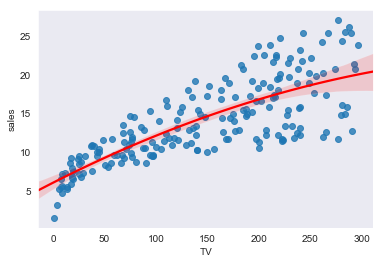

In [14]:
sns.regplot('TV', 'sales', data=data, order=2, line_kws={'color': 'red'})

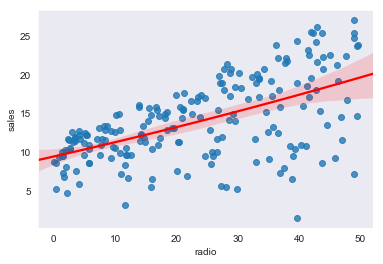

In [15]:
sns.regplot('radio', 'sales', data=data, order=2, line_kws={'color': 'red'})

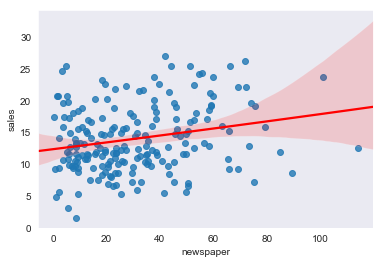

In [16]:
sns.regplot('newspaper', 'sales', data=data, order=2, line_kws={'color': 'red'})